In [2]:
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

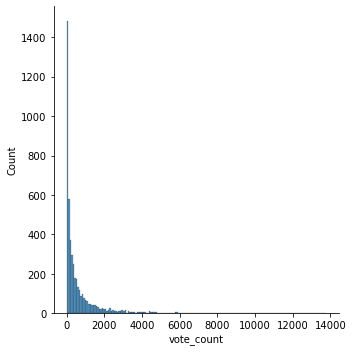

In [8]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
sns.displot(df['vote_count'])

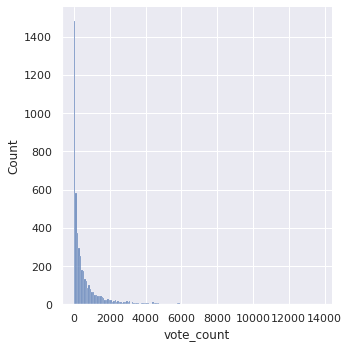

In [11]:
sns.set()
sns.displot(df['vote_count'])

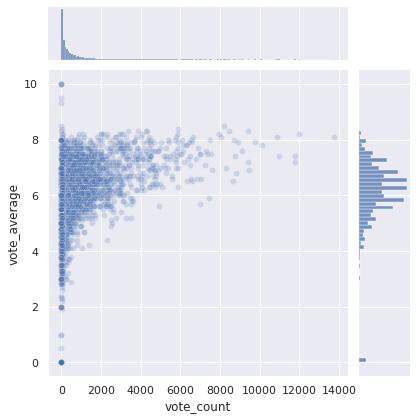

In [13]:
sns.jointplot(x='vote_count', y='vote_average', data=df, alpha=0.2)

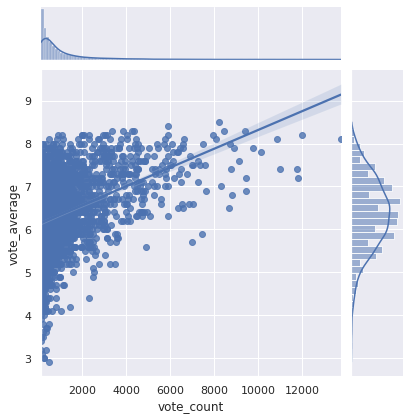

In [20]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
df = df[df['vote_count'] > 100]
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='reg')

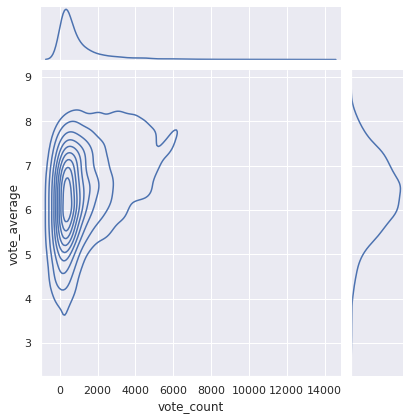

In [21]:
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='kde')

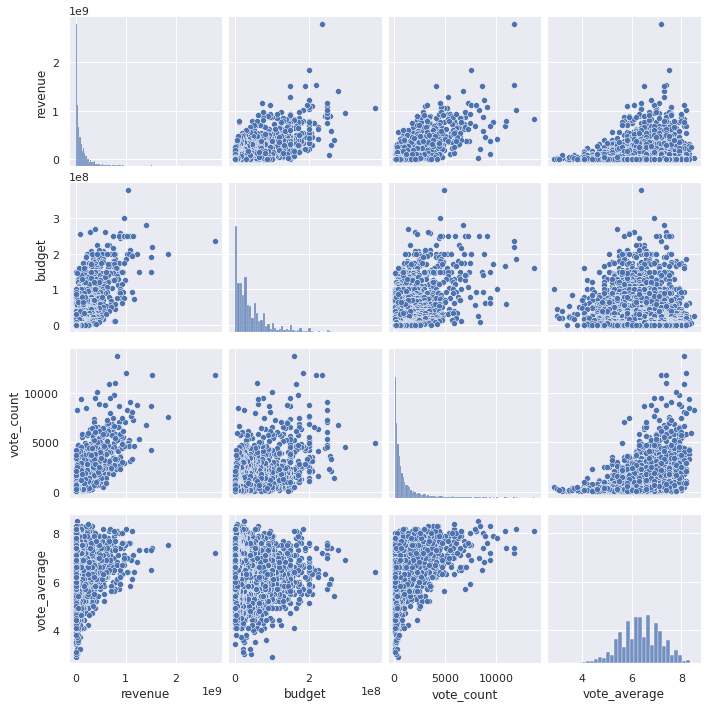

In [26]:
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average']])

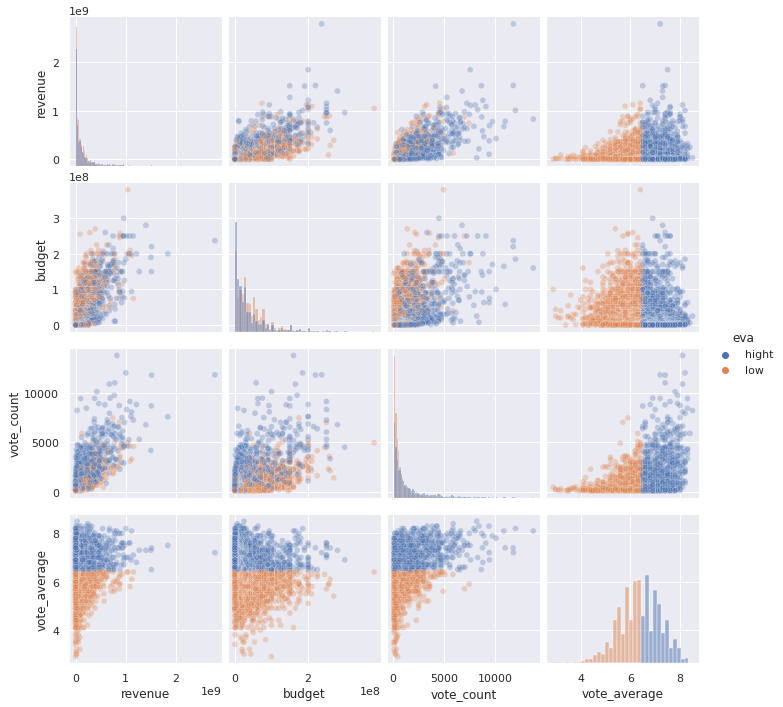

In [34]:
df['eva']=df['vote_average'].apply(lambda x: 'hight' if x > df['vote_average'].median() else 'low')
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average', 'eva']],
            hue='eva',
            plot_kws={'alpha':0.3},
            diag_kind='hist')